# 初期設定

In [11]:
!pip install wbdata pandas matplotlib
!pip install lightgbm
!pip install statsmodels

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 640.0 kB/s eta 0:00:03
   - -------------------------------------- 0.1/1.5 MB 812.7 kB/s eta 0:00:02
   - -------------------------------------- 0.1/1.5 MB 812.7 kB/s eta 0:00:02
   - -------------------------------------- 0.1/1.5 MB 812.7 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.5 MB 807.1 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.5 MB 827.9 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.5 MB 808.4 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.5 MB 654.9 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.5 MB 791.9 kB/s eta 0:00:02
   --------- ------------------------------ 0.4/1.5 MB 768.6 kB/s eta 0:00:02
   ---------- ----------------------------- 0.4/1.5 MB 757.8 kB/s eta 0:00:02
   ------------ --------------------------- 0.4/1.5 MB 763.9 kB/s eta 0:0

# 日本のGDPの取得

      NY.GDP.PCAP.CD
Year                
2022    34065.643896
2021    40094.559980
2020    40028.734173
2019    40415.956765
2018    39751.133098
...              ...
1964      902.867722
1963      775.592123
1962      684.565510
1961      608.864581
1960      508.702779

[63 rows x 1 columns]


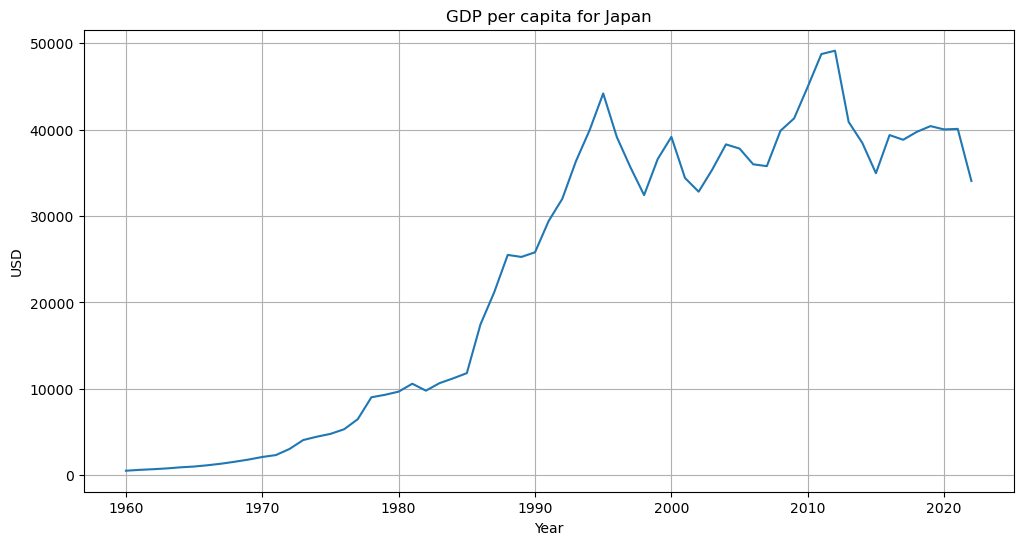

In [2]:
#!pip install wbdata pandas matplotlib

import wbdata
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# 日本の国コード
country_code = 'JPN'
# 取得したいデータ (一人当たりGDP)
indicator_code = 'NY.GDP.PCAP.CD'

# データ取得期間
data_date = (datetime.datetime(1960, 1, 1), datetime.datetime(2022, 1, 1))

# データの取得
data = wbdata.get_dataframe({indicator_code: indicator_code}, country=country_code, date=data_date)

# データフレームを整理 (インデックスを国コードから年に変更)
data = data.reset_index().rename(columns={'date': 'Year'})
data['Year'] = pd.to_datetime(data['Year']).dt.year
data = data.set_index('Year')

# データを表示
print(data)

# グラフ化
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[indicator_code])
plt.title(f'GDP per capita for Japan') # Hardcoded title as get_indicator is not available
plt.xlabel('Year')
plt.ylabel('USD')
plt.grid(True)
plt.show()

# 日本の消費量を取得

      EG.USE.ELEC.KH.PC
Year                   
2022        7803.269417
2021        7959.558565
2020        7687.536135
2019        7852.897744
2018        8057.889300
...                 ...
1964        1692.414064
1963        1520.333681
1962        1330.411975
1961        1257.774706
1960        1101.742190

[63 rows x 1 columns]


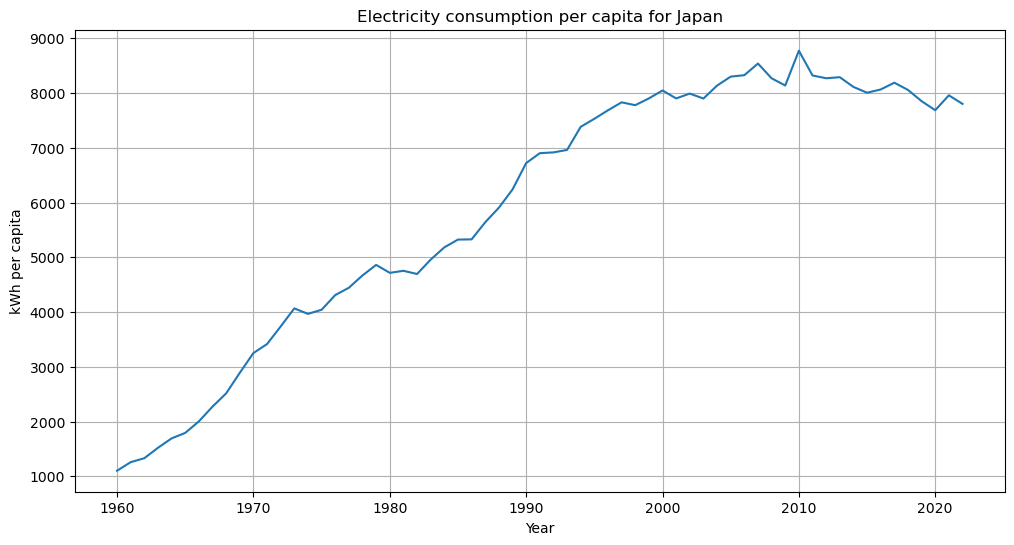

In [3]:
# prompt: WDIから日本の電力消費を出力してください

import pandas as pd
import matplotlib.pyplot as plt
import wbdata
import datetime

# 日本の国コード (Assuming country_code and data_date are defined elsewhere or in a previous cell)
# If not defined, you might need to add these lines:
country_code = 'JPN'
data_date = (datetime.datetime(1960, 1, 1), datetime.datetime(2022, 1, 1))


# 取得したいデータ (電力消費量)
indicator_code_electricity = 'EG.USE.ELEC.KH.PC' # 一人当たり電力消費量

# データの取得
data_electricity = wbdata.get_dataframe({indicator_code_electricity: indicator_code_electricity}, country=country_code, date=data_date)

# データフレームを整理 (インデックスを国コードから年に変更)
data_electricity = data_electricity.reset_index().rename(columns={'date': 'Year'})
data_electricity['Year'] = pd.to_datetime(data_electricity['Year']).dt.year
data_electricity = data_electricity.set_index('Year')

# データを表示
print(data_electricity)

# グラフ化
plt.figure(figsize=(12, 6))
plt.plot(data_electricity.index, data_electricity[indicator_code_electricity])
plt.title(f'Electricity consumption per capita for Japan') # Hardcoded title as get_indicator is not available
plt.xlabel('Year')
plt.ylabel('kWh per capita')
plt.grid(True)
plt.show()

# 日本における一人当たりGDPと一人当たり電力消費量の相関
GDPと電力消費量のデータを結合する

日本における一人当たりGDPと一人当たり電力消費量の相関: 0.9544


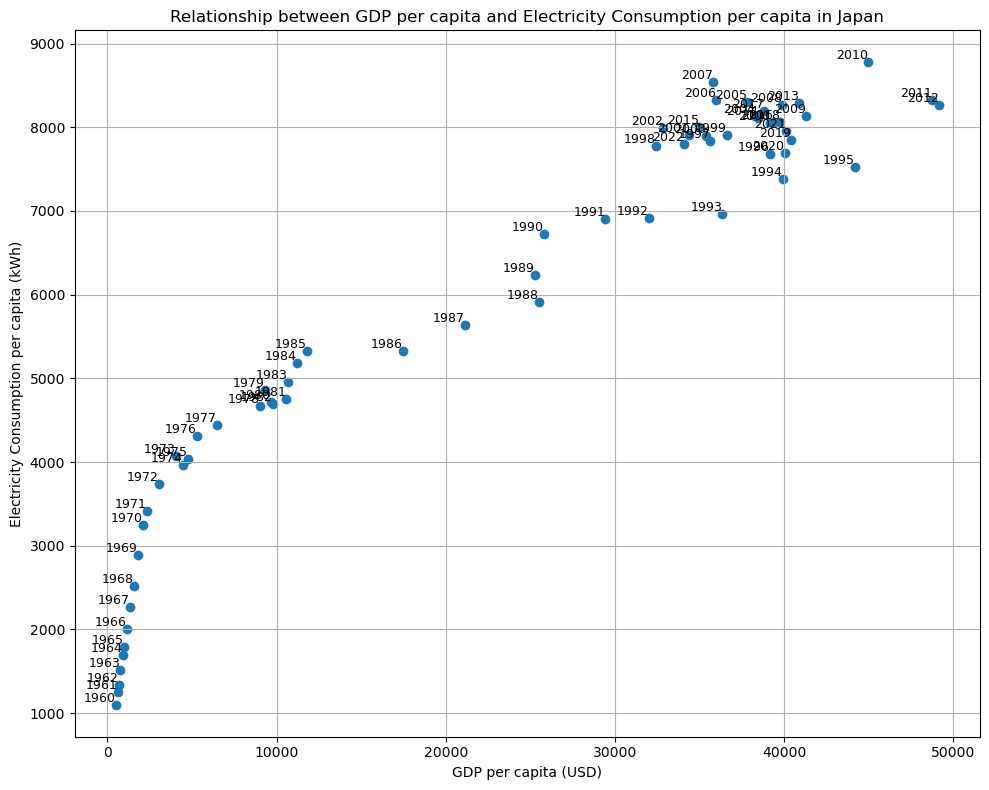

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# GDPと電力消費量のデータを結合
merged_data = pd.merge(data, data_electricity, left_index=True, right_index=True, how='inner')

# 相関を計算
correlation = merged_data[indicator_code].corr(merged_data[indicator_code_electricity])

print(f"日本における一人当たりGDPと一人当たり電力消費量の相関: {correlation:.4f}")

# 散布図を作成して相関を視覚化
plt.figure(figsize=(10, 8))
plt.scatter(merged_data[indicator_code], merged_data[indicator_code_electricity])

# 各点に年のラベルを追加
for year in merged_data.index:
    x = merged_data.loc[year, indicator_code]
    y = merged_data.loc[year, indicator_code_electricity]
    plt.text(x, y, str(year), fontsize=9, ha='right', va='bottom')

plt.title('Relationship between GDP per capita and Electricity Consumption per capita in Japan')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Electricity Consumption per capita (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

# どうやって長期電力需要を予測するか？
GDPと電力消費量には相関関係がある。また、エネルギーとGPDの間の関係としてはエネルギー（Energy inensity）がある。

人口　population
GDP　 Gross Domestic Product
エネルギー強度　Energy Intensity=Energy consumption / GDP


In [25]:
import wbdata, datetime
import pandas as pd


# 取得するWDIインジケーター
indicators = {
    'EG.USE.ELEC.KH.PC': 'electricity_use_per_capita',
    'NY.GDP.PCAP.CD': 'gdp_per_capita',
    'SP.POP.TOTL': 'population',
    # 'EG.FEC.RNEW.ZS': 'renewable_energy_percent',
    # 'EN.ATM.CO2E.PC': 'co2_emission_per_capita',
    'NV.IND.TOTL.ZS': 'industry_percent_gdp',
    'EG.ELC.ACCS.ZS': 'electrification_rate'
}

# データ期間
start = datetime.datetime(2001, 1, 1)
end = datetime.datetime(2022, 1, 1)

# データ取得
df = wbdata.get_dataframe(indicators, country='all')
df = df.reset_index()
df['date'] = pd.to_datetime(df['date'])
df = df[(df['date'].dt.year >= 2000) & (df['date'].dt.year <= 2022)]
df = df.dropna()

In [21]:
df['energy_consumption'] = df['electricity_use_per_capita'] * df['population']
df['gdp_total'] = df['gdp_per_capita'] * df['population']
df['energy_intensity'] = df['energy_consumption'] / df['gdp_total']
df = df.set_index('date')


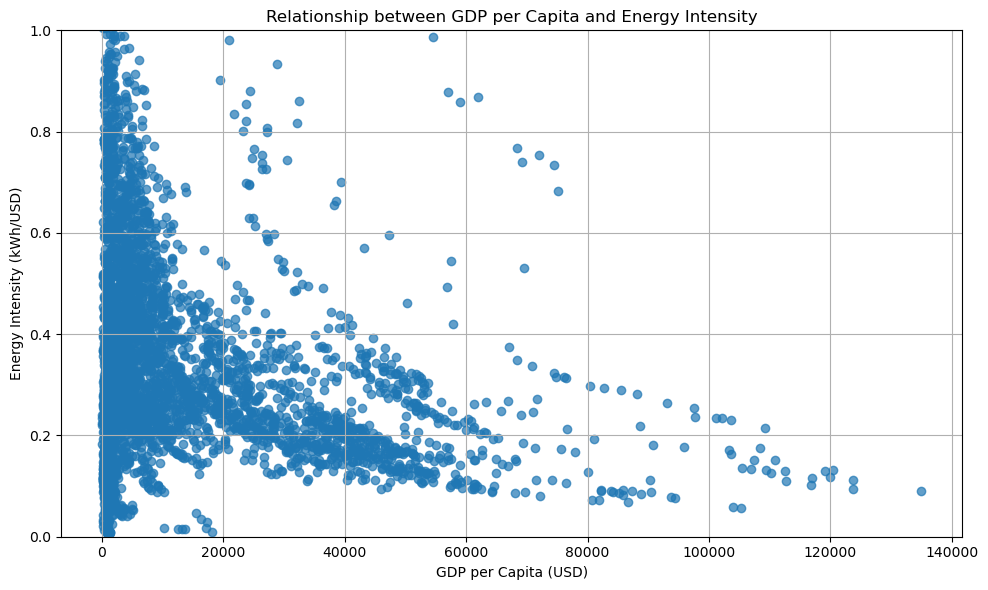

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['gdp_per_capita'], df['energy_intensity'], alpha=0.7)

# 軸ラベルとタイトル
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Energy Intensity (kWh/USD)')
plt.title('Relationship between GDP per Capita and Energy Intensity')

# 縦軸の表示範囲を0〜1に限定
plt.ylim(0, 1)

plt.grid(True)
plt.tight_layout()
plt.show()



## 学習

In [27]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import numpy as np

# 説明変数・目的変数
X = df.drop(columns=['electricity_use_per_capita', 'country', 'date'])
y = df['electricity_use_per_capita']

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 学習
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test)

model = lgb.train(
    params={
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
    },
    train_set=train_data,
    valid_sets=[valid_data],
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

# 評価
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[402]	valid_0's rmse: 1565.45
RMSE: 1565.45


In [13]:
future_data = pd.DataFrame({
    'gdp_per_capita': [2539],
    'population': [26000000],
    'industry_percent_gdp': [200],
    'electrification_rate': [30]
})

predicted = model.predict(future_data)
print(f"予測された一人当たり電力消費量（kWh/年）: {predicted[0]:.2f}")

予測された一人当たり電力消費量（kWh/年）: 1415.08
